## Normal Distribution
***

In [1]:
import numpy as np
from scipy.stats import norm, skew, kurtosis
import statistics as st
import matplotlib.pyplot as plt
import pandas as pd

#### Definition

Normal distribution also known as Gaussian or bell-curved distribution is a type of continuous probability distribution for independent random variables [1](https://en.wikipedia.org/w/index.php?title=Normal_distribution&oldid=1129344614). 
Being a continuous distribution means that the values of variables can fall anywhere in its range unlike the discrete distribution with limited or finite outcomes. It is a symmetrically shaped distribution with most of its values gathering around the centre. It commonly occurs in nature and therefore represents a very important concept in inferential statistics for analysing and predicting properties of the population.

The main concepts of the normal distribution were described in the notebook: **probability density function**, **main parameters**, **z-scores**, **empirical rule**, **measures of central tendency**, **central limit theorem**, **skewness** and **kurtosis**.

**Probability density function** of the normal distribution:

$$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$$

x - random variable  
$\pi$ = 3.14159  
e = 2.71828  
$\mu$ - mean  
$\sigma$ - standard deviation  
$\sigma^2$ - variance

One of the characteristics of the normal distribution is that the area under its curve **sums to 1** or 100% of probability. 

#### Parameters

The main parameters of the normal distribution are the **mean** ($\mu$) representing the average and the **standard deviation** ($\sigma$) representing the measure of dispersion of data around the mean. The higher the standard deviation the wider the distribution. [2](https://en.wikipedia.org/wiki/Standard_deviation). While the $\mu$ and $\sigma$ are the parameters of the population, the standard deviation of a sample is represented with s and the mean with $\overline x$. Standard deviation is a square root of the variance $\sigma^2$.    

Using the formula we can plot the normal distribution by setting the values of mu and sigma. 

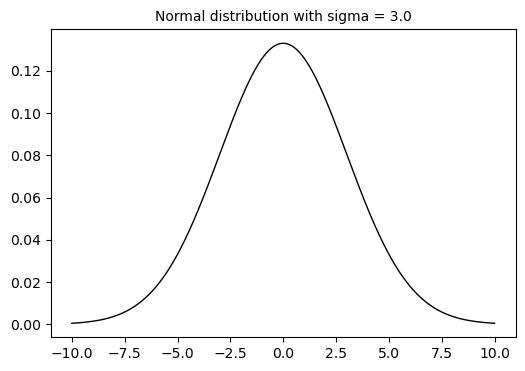

In [2]:
fig, ax = plt.subplots(figsize=(6,4))

mu, sigma = 0.0, 3.0

# for the x axis we can use arange or the linspace function;
# if we are using a non-integer step, such as 0.1, better to use numpy.linspace

x = np.linspace(-10.0, 10.0, 10000)

y = 1.0/np.sqrt(2 * np.pi * sigma**2) * np.exp(-((x-mu)**2/(2*sigma**2)))

ax.plot(x, y, color='black', linewidth=1)
ax.set_title('Normal distribution with sigma = 3.0', fontsize=10);

To see how the distribution changes its shape we can change the value of sigma

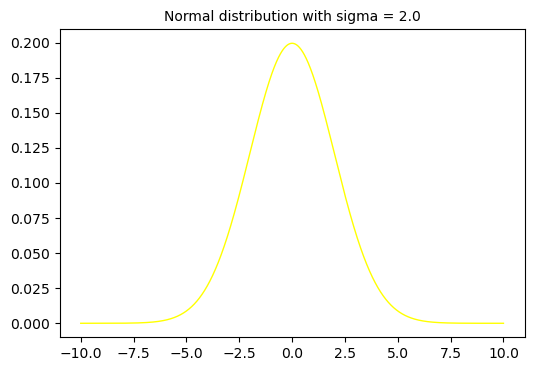

In [3]:
fig, ax = plt.subplots(figsize=(6,4))

mu, sigma = 0.0, 2.0

x = np.linspace(-10.0, 10.0, 10000)

y = 1.0/np.sqrt(2 * np.pi * sigma**2) * np.exp(-((x-mu)**2/(2*sigma**2)))

ax.plot(x, y, color='yellow', linewidth=1)
ax.set_title('Normal distribution with sigma = 2.0', fontsize=10);

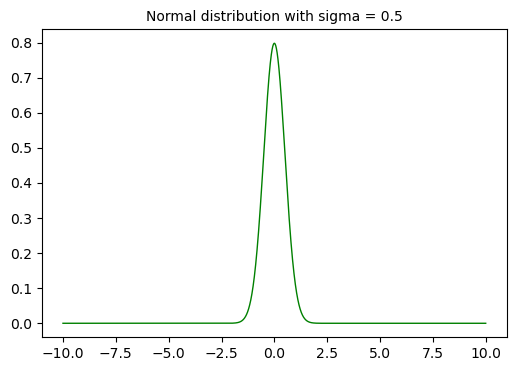

In [4]:
fig, ax = plt.subplots(figsize=(6,4))

mu, sigma = 0.0, 0.5

x = np.linspace(-10.0, 10.0, 10000)

y = 1.0/np.sqrt(2 * np.pi * sigma**2) * np.exp(-((x-mu)**2/(2*sigma**2)))

ax.plot(x, y, color='green', linewidth=1)
ax.set_title('Normal distribution with sigma = 0.5', fontsize=10);

From the above distributions we can see how data spread or sigma value changes the shape of distribution around the mean. The lower the sigma the closer the data are to the distribution's mean.  

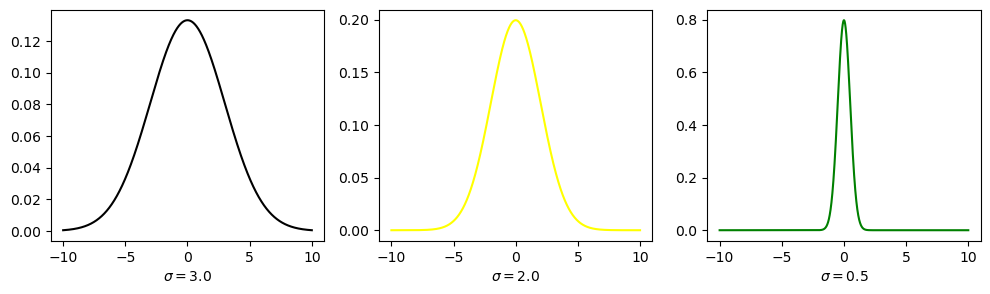

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

mu, sigma = 0.0, 3.0

x1 = np.linspace(-10.0, 10.0, 10000)
y1 = 1.0/np.sqrt(2 * np.pi * sigma**2) * np.exp(-((x1-mu)**2/(2*sigma**2)))

mu, sigma = 0.0, 2.0

x2 = np.linspace(-10.0, 10.0, 10000)
y2 = 1.0/np.sqrt(2 * np.pi * sigma**2) * np.exp(-((x2-mu)**2/(2*sigma**2)))

mu, sigma = 0.0, 0.5

x3 = np.linspace(-10.0, 10.0, 10000)
y3 = 1.0/np.sqrt(2 * np.pi * sigma**2) * np.exp(-((x3-mu)**2/(2*sigma**2)))

ax[0].plot(x1, y1, color='black', linewidth=1.5)
ax[1].plot(x2, y2, color='yellow', linewidth=1.5)
ax[2].plot(x3, y3, color='green', linewidth=1.5)

ax[0].set_xlabel('$\sigma=3.0$', fontsize=10)
ax[1].set_xlabel('$\sigma=2.0$')
ax[2].set_xlabel('$\sigma=0.5$');

plt.savefig('images/sigma.png', bbox_inches='tight')

#### Standard Deviation and Standard Error

It is worth noting the distinction between the standard deviation (SD) and the standard error (SE). While both represent the measure of variability, the standard deviation shows how far are the values from the sample mean and the standard error shows the variability between multiple samples and their means. If the standard error is high the sample means are further from the population mean and if the standard error is small, the sample means are good estimator of the population mean [3](https://statisticsbyjim.com/basics/difference-standard-deviation-vs-standard-error/). The distribution to show the standard error is called the sampling distribution. 



#### Another way of writing the formula: 

_The formula was taken from Khan, S., reference at the bottom of the notebook_ [4](https://www.khanacademy.org/math/statistics-probability/modeling-distributions-of-data/more-on-normal-distributions/v/introduction-to-the-normal-distribution)

$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$

$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2} (\frac {x-\mu}{\sigma})^2}$

$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} (e^{(\frac {x-\mu}{\sigma})^2}) ^ {-\frac{1}{2}}$

$p(x) = \frac{1}{\sqrt{{2\pi \sigma^2} {e^{z}}^2}}$

#### z-scores 

Writing the formula this way gives a clearer picture of its elements. In this case _z_ represents the number of standard deviations the value is away from the mean. _z-scores_ are also called the _standard scores_ or the _z-values_. The formula is:    
 
$$z = \frac {x-\mu}{\sigma}$$

where $x-\mu$ represents the distance between the given datapoint and the mean dividing it by standard deviation $\sigma$. In case of a sample the formula is:  
    
$$ z = \frac {x-\overline x}{s} $$  

_x_ is the value or the datapoint we are interested in, $\overline x$ is the mean of the sample and s is the standard deviation.[4](https://en.wikipedia.org/wiki/Standard_score)

With multiple samples we are checking how many standard errors are the sample means from the population mean. The formula for standard error is:  
    
$$ SE = \frac {\sigma}{\sqrt {n}} $$

while the formula for z-scores for multiple samples is:  
    
 $$ z = \frac {x-\mu}{{\sigma} /{\sqrt {n}}} $$

If we have more samples (n) the standard deviation will get smaller, if we have less samples the standard deviation will get larger.

Z-scores represent a good tool for navigating and interpreting results since it tells us how many standard deviation we are from the mean which gives us more orientation of how values are placed. Positive z-scores tell us how many standard deviations we are above the mean while the negative z-scores tell us how many standard deviations we are below the mean. One of the ways to use z-scores is finding the outliers in data depending on the threshold of z-scores, usually it is a -3 standard deviations or 3 standard deviations, anything below or above these values is considered an outlier. 

Z-scores are also used in the Confidence interval (CI), or the range where is likely that the population's parameter we want to find is going to fall. The most commonly used is CI=95% which responds to -1.96 z-score being the lower limit and 1.96 z-score being the upper limit.   

$$CI = \overline x \pm z \frac{s}{\sqrt n}$$ 

$$CI = \overline x \pm 1.96 \frac{s}{\sqrt n}$$ 

#### Empirical rule

_Empirical_, _68-95-99.7_ or _three-sigma_ rule tells us how many standard deviations we are from the mean in a normal, Gaussian distribution. If we are one standard deviation away from the mean in both directions we are going to have 68% of the values falling into that range, 95% of the values will fall into two standard deviations range and 99,7% into 3 standard deviation range. By following this rule we can say that 99.7% of data fall within three standard deviations from the mean as shown in the plot below. 

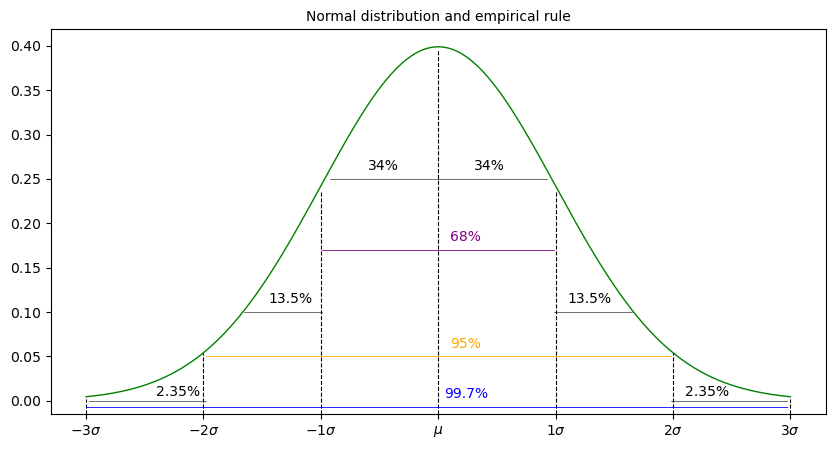

In [6]:
mu, sigma = 0.0, 1.0

x = np.linspace(-3.0, 3.0, 100000)

y = 1.0/np.sqrt(2 * np.pi * sigma**2) * np.exp(-((x-mu)**2/(2*sigma**2)))

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y, color='green', linewidth=1)
ax.axvline(x=1, color='black', ymax=0.58, linewidth=.8, linestyle='--')
ax.axvline(x=0, color='black', ymax=0.95, linewidth=.8, linestyle='--')
ax.axvline(x=2, color='black', ymax=0.16, linewidth=.8, linestyle='--')
ax.axvline(x=3, color='black', ymax=0.04, linewidth=.8, linestyle='--')
ax.axvline(x=-1, color='black', ymax=0.58, linewidth=.8, linestyle='--')
ax.axvline(x=-2, color='black', ymax=0.16, linewidth=.8, linestyle='--')
ax.axvline(x=-3, color='black', ymax=0.04, linewidth=.8, linestyle='--')


ax.axhline(y=0.25, xmin=0.5, xmax=0.64, color='black', linewidth=0.4)
ax.text(x=0.3, y=0.26, s='34%');

ax.axhline(y=0.25, xmin=0.36, xmax=0.5, color='black', linewidth=0.4)
ax.text(x=-0.6, y=0.26, s='34%');

ax.axhline(y=0.1, xmin=0.25, xmax=0.35, color='black', linewidth=0.4)
ax.text(x=-1.45, y=0.11, s='13.5%');

ax.axhline(y=0.1, xmin=0.65, xmax=0.75, color='black', linewidth=0.4)
ax.text(x=1.1, y=0.11, s='13.5%');

ax.axhline(y=0.00, xmin=0.05, xmax=0.2, color='black', linewidth=0.4)
ax.text(x=-2.4, y=0.005, s='2.35%');

ax.axhline(y=0.00, xmin=0.80, xmax=0.95, color='black', linewidth=0.4)
ax.text(x=2.1, y=0.005, s='2.35%');

ax.axhline(y=-0.007, xmin=0.045, xmax=0.95, color='blue', linewidth=0.6)
ax.text(x=0.05, y=0.003, s='99.7%', color='blue');

ax.axhline(y=0.05, xmin=0.20, xmax=0.80, color='orange', linewidth=0.6)
ax.text(x=0.1, y=0.06, s='95%', color='orange');

ax.axhline(y=0.17, xmin=0.35, xmax=0.65, color='purple', linewidth=0.6)
ax.text(x=0.1, y=0.18, s='68%', color='purple');

labels = ['$-3\sigma$', '$-2\sigma$', '$-1\sigma$', '$\mu$', '$1\sigma$', '$2\sigma$', '$3\sigma$']

ax.xaxis.set_ticks(np.arange(-3, 4, 1))
ax.set_xticklabels(labels, minor=False)

ax.set_title('Normal distribution and empirical rule', fontsize=10);
plt.savefig('images/empirical_rule.png', bbox_inches='tight')

#### Measures of Central Tendency

The measure of central tendency represents the centre or the typical value of the probability distribution. Arithmetic mean, median and mode are the main measures of central tendency. Besides these, there are other measures like generalized mean, geometric mean, harmonic mean, weighted arithmetic mean, geometric median etc [5](https://en.wikipedia.org/wiki/Central_tendency).  We are going to focus on the three main measures.  
One of the characteristics of the normal distribution is that its mean, mode and median are all **equal**.

**Mean** represents the average of values we get by calculating their sum dividing it by the number of values:  

$$\bar{x} = \frac {\Sigma X_{i}}{n}$$  

or:

$$\bar{x} = \frac{1}{n} \overset{n}{\underset{i=1}{\Sigma}} x_{i}$$

**Median** represents the middle value of the set of values. Depending on the total number of values, median will be either the middle number if the number of the total values is odd or the average of two middle numbers if the total of values is even. [6](https://www.w3schools.com/python/ref_stat_median.asp). Before calculating the median, the values are sorted in ascending order. Below is the median formula for odd and even values [7](https://www.sqlservercentral.com/articles/mean-median-mode-using-sql-and-dax).  


_Even n_:

$$Median = \left(\frac{n+1}{2}\right)^{th} \space observation$$

_Odd n_:

$$Median = \frac {\left(\frac {n}{2}\right)^{th} + \left( \frac{n}{2} + 1 \right) ^{th} \space observation}{2}$$

**Mode** is the most frequent value appearing in the data set. Data set can have one mode, two modes or more. After ordering the values we check how many times each of the values appear. 

Depending on the type of variable we should consider using different central tendency measures.  Mode is suitable for nominal variables, median is good for ordinal variables and skewed distributions and mean for normal distributions. [8](https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php). 

In [7]:
# We used statistics module to check the mean, median and mode
# We added a list of numbers and calculated the mean
test = [1, 2, 3, 4, 4, 4, 5, 7]
st.mean(test)

3.75

In [8]:
# The mode returned 4 which is the value that appeared the most frequently in the list
st.mode(test)

4

In [9]:
# The median of our list with even number of values returned 4 since two middle numbers were added and divided by 2
st.median(test)

4.0

In [10]:
# To visualise the mean and the median we generated a sample of random numbers from normal distribution
np.random.seed(0)
x = np.random.normal(100, 50, 10000)
x

array([188.2026173 , 120.00786042, 148.93689921, ..., 125.84360895,
        98.35396535, 164.9055716 ])

In [11]:
st.median(x)

98.64637005309663

In [12]:
st.mean(x)

99.0783139920867

In [13]:
# Then we added an outlier to see if it's going to affect the returned values
x = np.append(x, [200000])

In [14]:
# The median hasn't changed with adding the outlier
np.median(x)

98.64998663951698

In [15]:
# The mean with the outlier
np.mean(x)

119.06640735135157

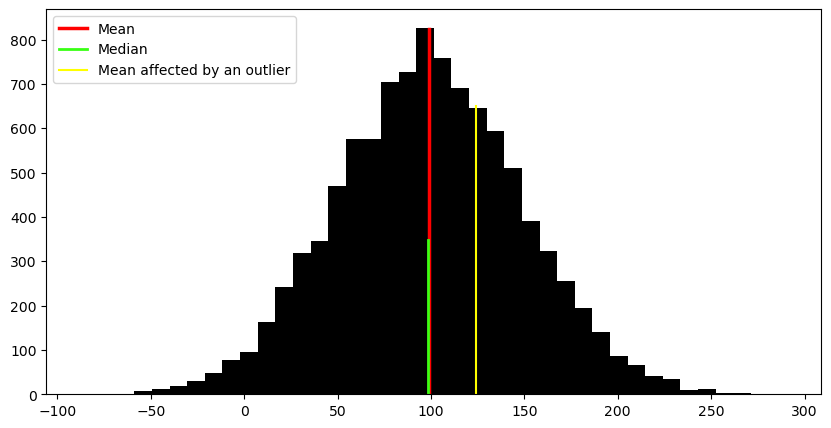

In [16]:
# The mean shifted when we added the outlier
np.random.seed(0)
x = np.random.normal(100, 50, 10000)

fig, ax = plt.subplots(figsize=(10,5))
ax.hist(x, 40, color='black');

ax.axvline(x=99.07, color='red', ymax=0.95, linewidth=2.5, label='Mean')
ax.axvline(x=98.64, color='#39FF14', ymax=0.40, linewidth=2.0, label='Median')
ax.axvline(x=124.05, color='yellow', ymax=0.750, linewidth=1.5, label='Mean affected by an outlier')
ax.legend(loc='upper left');
plt.savefig('images/mct.png', bbox_inches='tight')

#### Central Limit Theorem

Central limit theorem is a key concept in probability theory and statistics. To understand it, it is necessary to explain _sampling distribution_ that refers to a distribution of the sample means drawn from the population. In simple terms, it states that the means of the samples regardless of the individual distributions of those samples will form the normal distribution if the number of taken samples is large enough to show it. Parametric tests used to estimate the population’s parameters with the premise of a normal distribution are based on this theorem, such as linear regression, t-test and ANOVA. To be able to apply the CLT some of the conditions must be satisfied: samples have to be chosen randomly, they have to be independent from each other and of the same size. The standard for the minimum sample size for CLT to be applied is considered to be 30. [9](https://www.investopedia.com/terms/c/central_limit_theorem.asp)

To show the Central limit theorem in practice we used an example of dice rolling from DataCamp.[10](https://campus.datacamp.com/courses/introduction-to-statistics-in-python/more-distributions-and-the-central-limit-theorem-3?ex=6)

In [17]:
# pandas series was created for 6 values from which 5 samples were taken; rolling a dice 5 times
die = pd.Series([1, 2, 3, 4, 5, 6])
sample_5 = die.sample(5, replace=True)
print(sample_5)

4    5
0    1
4    5
1    2
3    4
dtype: int64


In [18]:
# We calculated the mean of the original series from 1 to 6
np.mean(die)

3.5

In [19]:
# The mean for the 5 samples was calculated
np.mean(sample_5)

3.4

In [20]:
# The same process was done for another 5 samples
die = pd.Series([1, 2, 3, 4, 5, 6])
sample_5 = die.sample(5, replace=True)
sample_5

1    2
4    5
1    2
3    4
4    5
dtype: int64

In [21]:
np.mean(sample_5)

3.6

In [22]:
# The empty list was created together with the for loop to append the calculated means to that list
# The number of samples was changed to 10
# The dice was rolled 5 times x 10 times and the means of those rolls were added to the list
sample_means = []
for i in range(10):
    sample_5 = die.sample(5, replace=True)
    sample_means.append(np.mean(sample_5))
sample_means

[4.4, 3.0, 2.6, 5.0, 1.6, 3.8, 3.2, 2.6, 6.0, 2.8]

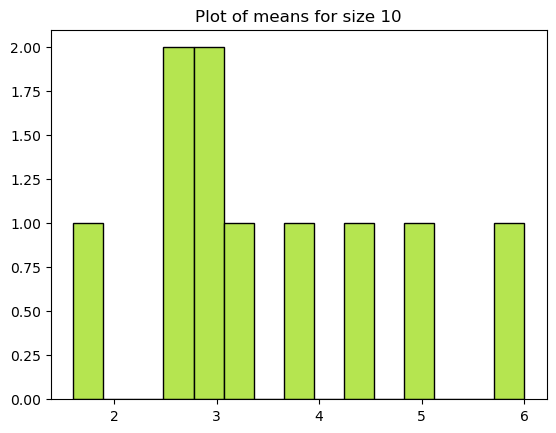

In [23]:
# Plot of means of size 10
plt.hist(sample_means, bins=15, color='#b5e550', edgecolor='black');
plt.title('Plot of means for size 10');

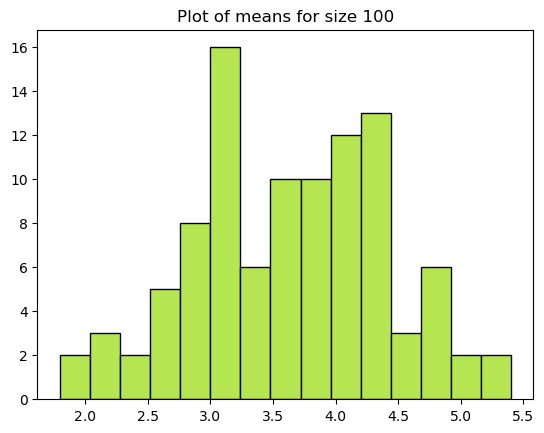

In [24]:
# The same was done with 100 sample means
# We can see how the output distribution changes according to the increased number of samples
sample_means = []
for i in range(100):
    sample_means.append(np.mean(die.sample(5, replace=True)))
plt.hist(sample_means, bins=15, color='#b5e550', edgecolor='black');
plt.title('Plot of means for size 100');

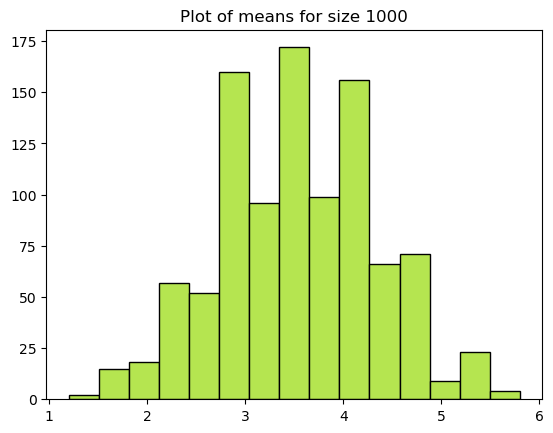

In [25]:
# Sample number = 1000
sample_means = []
for i in range(1000):
    sample_means.append(np.mean(die.sample(5, replace=True)))
plt.hist(sample_means, bins=15, color='#b5e550', edgecolor='black');
plt.title('Plot of means for size 1000');

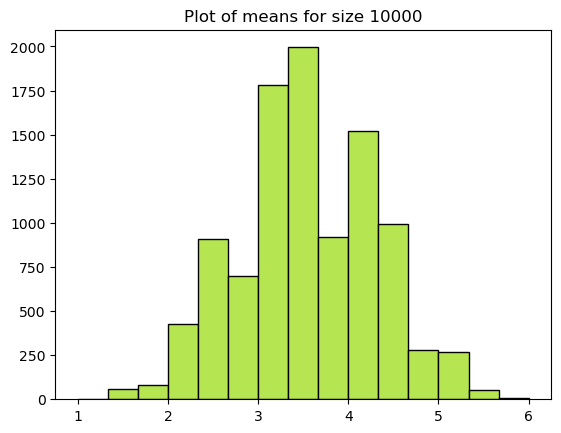

In [26]:
# Sample number = 10000
sample_means = []
for i in range(10000):
    sample_means.append(np.mean(die.sample(5, replace=True)))
plt.hist(sample_means, bins = 15, color='#b5e550', edgecolor='black');
plt.title('Plot of means for size 10000');

The more sample means we had the sampling distribution was getting more similar to the normal distribution even if our initial distribution of rolling a die was uniform.  

In [27]:
# We checked the mean of the sampling distribution, it got close to the original series' mean of 3.5
np.mean(sample_means)

3.5138199999999995

#### Skewness and Kurtosis

**Skewness** measures the asymmetry of the distribution. It can take three forms: positively skewed or the right-skewed with its tail longer on the right side and its peak to the left, where the mean is placed to the right of the median; left-skewed or the negatively skewed with longer tail on the left side where mean is to the left of the median and the zero-skewed that is symmetrical and does not lean to any side. Since the interpretation of the skewness depends on the tail instead of its peak which can be confusing, we should be careful in reading the results. Skewness is useful since it can point to the direction of the outliers. It can be calculated in two ways with Pearson’s first and second coefficients of skewness, depending which measures of central tendency better describe our distribution, for example, if we have two modes it is better to use the second coefficient [11](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/pearsons-coefficient-of-skewness/) 

_With mode:_

$$Sk1 = \frac {\overline x - Mo}{s}$$

_With median:_

$$Sk2 = \frac {3(\overline x - Md)}{s}$$

If the skewness is greater than 1 or less than -1, the distribution is considered to be highly skewed, if the skewness is between 0.5 and 1 or -0.5 and -1 it is moderately skewed and between 0.5 and -0.5 is considered to be symmetrical. 

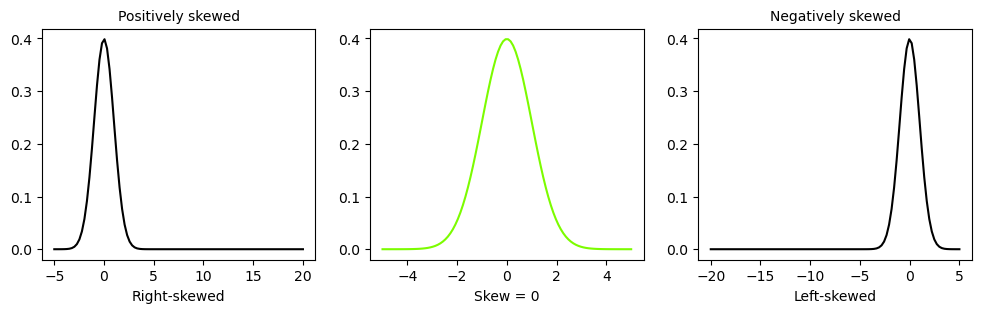

In [28]:
# Three types of skewness
mu, sigma = 0.0, 1.0

fig, ax = plt.subplots(1, 3, figsize=(12,3))

x1 = np.linspace(-5, 20, 100)
y1 = 1.0/np.sqrt(2 * np.pi * sigma**2) * np.exp(-((x1-mu)**2/(2*sigma**2)))

x2 = np.linspace(-5, 5, 100)
y2 = 1.0/np.sqrt(2 * np.pi * sigma**2) * np.exp(-((x2-mu)**2/(2*sigma**2)))

x3 = np.linspace(-20, 5, 100)
y3 = 1.0/np.sqrt(2 * np.pi * sigma**2) * np.exp(-((x3-mu)**2/(2*sigma**2)))

ax[0].plot(x1, y1, color='black', linewidth=1.5)
ax[1].plot(x2, y2, color='#7CFC00', linewidth=1.5) 
ax[2].plot(x3, y3, color='black', linewidth=1.5)
ax[0].set_xlabel('Right-skewed')
ax[1].set_xlabel('Skew = 0')
ax[2].set_xlabel('Left-skewed')
ax[0].set_title('Positively skewed', fontsize=10)
ax[2].set_title('Negatively skewed', fontsize=10);
plt.savefig('images/skewness.png', bbox_inches='tight')

**Kurtosis**

Kurtosis is the ‘tailedness’ of the distribution and it refers to its outliers. Three types of kurtosis are: **mesokurtic**, **platykurtic** and **leptokurtic** depending on the excess kurtosis. **Excess kurtosis** compares the tails of the distribution to the normal distribution. Since the normal distribution has the kurtosis=3 when we subtract 3 from it, we get zero for the excess kurtosis, this means that the normal distribution is mesokurtic distribution. Leptokurtic distributions have positive excess kurtosis (>0), high value (>3) and heavy tails, for example Laplace distribution, while the platykurtic has light tails with negative excess kurtosis (<0) and low kurtosis (<3) like in example of the uniform distribution. [12](https://statisticsbyjim.com/basics/kurtosis/). It should be noted that the excess kurtosis is sometimes labelled just as kurtosis but it is important to make the distinction between the two. 

In [29]:
# Using numpy and scipy we can check skewness and kurtosis of normal distribution
x = np.random.normal(0, 2, 10000)
skew(x)

-0.013021559395140448

In [30]:
kurtosis(x)

0.02342323456839379

#### Conclusion

Describing the concepts of the normal distribution through practical examples and visual representations was a useful reminder of its importance in statistics and data analysis. 

#### References:
 * Mcloughlin, I., (2022). GitHub repository, https://github.com/ianmcloughlin/2223-S1-fund-data-analysis/blob/main/notebooks/04-outliers.ipynb  
 * Wikipedia contributors. (2022, December 24). Normal distribution. In Wikipedia, The Free Encyclopedia. Retreived December 26, 2022 from https://en.wikipedia.org/w/index.php?title=Normal_distribution&oldid=1129344614  
 * Wikipedia contributors. (2022, November 9). Standard deviation. In Wikipedia, The Free Encyclopedia. Retrieved December 27, 2022 from https://en.wikipedia.org/w/index.php?title=Standard_deviation&oldid=1120954441  
 * NumPy documentation (2022). numpy.random.nromal, Version 1.24, Retrieved January 5, 2023 from https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html    
 * Frost, J., (n.d.). Difference Between Standard Deviation and Standard Error, Retrieved January 5, 2023 from https://statisticsbyjim.com/basics/difference-standard-deviation-vs-standard-error/   
 * Khan, S. (n.d.). Deep definition of the normal distribution. Khan Academy, Retrieved December 30, 2022 from https://www.khanacademy.org/math/statistics-probability/modeling-distributions-of-data/more-on-normal-distributions/v/introduction-to-the-normal-distribution  
 * Wikipedia contributors. (2022, December 19). Standard score. In Wikipedia, The Free Encyclopedia. Retrieved January 2, 2023 from https://en.wikipedia.org/w/index.php?title=Standard_score&oldid=1128321544  
 * Unutbu (2012, September 26). Changing the tick frequency on the x or y axis. Answer in Stack Overflow. Retrieved January 5, 2023 from https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-the-x-or-y-axis  
 * CT Zhu (2013, September, 22). Modify tick label text. Answer in Stack Overflow. Retrieved January 5, 2023 from https://stackoverflow.com/questions/11244514/modify-tick-label-text  
 * Wikipedia contributors. (2022, September 14). Central tendency. In Wikipedia, The Free Encyclopedia. Retrieved January 6, 2023, from https://en.wikipedia.org/w/index.php?title=Central_tendency&oldid=1110252458      
 * W3Shcools (n.d.). Python statistics.median() Method. Retrieved January 6, 2023 from https://www.w3schools.com/python/ref_stat_median.asp  
 * Laerd Statistics (n.d.). Measures of Central Tendency. Retrieved January 6, 2023 from https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php  
 * Ganti, A. (2022, June 28). Central Limit Theorem (CLT): Definition and Key Characteristics. In Investopedia, Retreived January 6, 2023 from https://www.investopedia.com/terms/c/central_limit_theorem.asp
 * Glen, S. (n.d.). Pearson’s Coefficient of Skewness. From StatisticsHowTo.com: Elementary Statistics for the rest of us! Retrieved January 6, 2023 from https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/pearsons-coefficient-of-skewness/  
 * Frost, J., (n.d.). Kurtosis: Definition, Leptokurtic & Platykurtic. Retrieved January 6, 2023 from https://statisticsbyjim.com/basics/kurtosis/  
 * gourishankar (2020, February 28). Mean Median Mode using SQL and DAX. Retrieved January 6, 2023 from https://www.sqlservercentral.com/articles/mean-median-mode-using-sql-and-dax  7
 * Matsui, M. (n.d.). The central limit theorem. In DataCamp. Retrieved January 4, 2023 from https://campus.datacamp.com/courses/introduction-to-statistics-in-python/more-distributions-and-the-central-limit-theorem-3?ex=6    